In [1]:
# Initialize and Import Required Modules

In [2]:
# General Libraries
import torch
import argparse
import numpy as np
import random
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:


# Test minst 122



In [4]:
# Import the MNIST Autoencoder file
import MNIST_122  

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define arguments
args = argparse.Namespace(
    data_path="../data",
    batch_size=128,
    latent_dim=128,
    device=device
)

In [5]:
#Load the Dataset and Check It

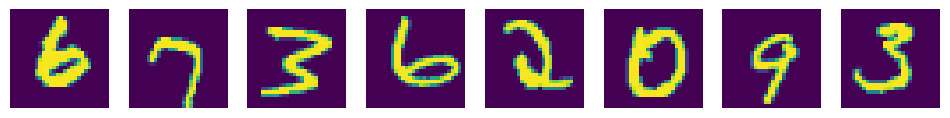

In [6]:
# Load dataset
train_loader, val_loader, test_loader = MNIST_122.load_data(args)

# Retrieve a batch of images
images_0_1, _ = next(iter(train_loader))

# Convert images to range [0,255] for proper display
images_0_255 = images_0_1 * 255  # Scale if needed

# Visualize some images
fig, axes = plt.subplots(1, 8, figsize=(12, 4))
for i in range(8):
    img = images_0_255[i].permute(1, 2, 0).numpy()  # Convert (C, H, W) → (H, W, C)
    img = np.clip(img, 0, 255).astype("uint8")  # Ensure valid pixel values
    axes[i].imshow(img)
    axes[i].axis("off")

plt.show()


In [7]:
#Verify the Autoencoder Model Architecture

In [8]:
# Initialize model
encoder_model = MNIST_122.Encoder(args.latent_dim).to(args.device)

# Print model summary
print(encoder_model)

Encoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=1568, out_features=128, bias=True)
  )
)


In [9]:
# Initialize model
classifier_model = MNIST_122.Classifier(args.latent_dim).to(args.device)

# Print model summary
print(classifier_model)

Classifier(
  (fc): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [10]:
#Train the model

In [11]:
MNIST_122.train_encoder_classifier(encoder_model, classifier_model, train_loader, val_loader, args, epochs=15)

Epoch [1/15], Train Loss: 0.4848, Train Acc: 85.02%, Val Loss: 0.1571, Val Acc: 95.25%


Epoch [2/15], Train Loss: 0.1408, Train Acc: 95.80%, Val Loss: 0.1009, Val Acc: 96.83%


Epoch [3/15], Train Loss: 0.0965, Train Acc: 97.11%, Val Loss: 0.0726, Val Acc: 97.70%


Epoch [4/15], Train Loss: 0.0767, Train Acc: 97.65%, Val Loss: 0.0668, Val Acc: 97.94%


Epoch [5/15], Train Loss: 0.0641, Train Acc: 98.05%, Val Loss: 0.0624, Val Acc: 98.15%


Epoch [6/15], Train Loss: 0.0561, Train Acc: 98.22%, Val Loss: 0.0553, Val Acc: 98.33%


Epoch [7/15], Train Loss: 0.0487, Train Acc: 98.50%, Val Loss: 0.0519, Val Acc: 98.42%


Epoch [8/15], Train Loss: 0.0422, Train Acc: 98.65%, Val Loss: 0.0494, Val Acc: 98.54%


Epoch [9/15], Train Loss: 0.0375, Train Acc: 98.80%, Val Loss: 0.0517, Val Acc: 98.44%


Epoch [10/15], Train Loss: 0.0351, Train Acc: 98.89%, Val Loss: 0.0530, Val Acc: 98.49%


Epoch [11/15], Train Loss: 0.0316, Train Acc: 98.93%, Val Loss: 0.0555, Val Acc: 98.38%


Epoch [12/15], Train Loss: 0.0279, Train Acc: 99.09%, Val Loss: 0.0513, Val Acc: 98.63%


Epoch [13/15], Train Loss: 0.0269, Train Acc: 99.13%, Val Loss: 0.0477, Val Acc: 98.53%


Epoch [14/15], Train Loss: 0.0229, Train Acc: 99.24%, Val Loss: 0.0511, Val Acc: 98.61%


Epoch [15/15], Train Loss: 0.0240, Train Acc: 99.19%, Val Loss: 0.0531, Val Acc: 98.50%
